# 지도학습

- 지도학습이란 입력,출력 샘플 데이터가 존재. 입력으로부터 출력을 예측하고자 할 때 사용
- 분류(classification)과 회귀(regression)가 존재

1) 분류
- 분류란 미리 정의된 클래스 레이블(class label) 중에서 하나를 예측하는 것.
- 이진분류와 다중분류 존재
- 이진분류 예) 스펨메일 분류 , 다중분류 예) 붓꽃분류

2) 회귀(regression)
- 연속적인 숫자(실수)를 예측하는 것.
- 예) 교육수준, 나이, 주거지를 바탕으로 연간 소득 예측하기

일반화(generalization) - 모델이 처음 보는 데이터에 대해 정확하게 예측한다면 training set에서 test set으로 일반화 되었다고 함.

과대적합(overfitting) - 가진 정보를 모두 활용하여 너무 복잡하게 모델을 만듬


과소적합(underfitting) - 너무 간단한 모델

# 예제 데이터셋 구축

In [1]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# forge dataset은 이진 분류 데이터셋
X,y = mglearn.datasets.make_forge()

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
print("shape of X:",X.shape)
print("X Data:",X)
print("shape of y:",y.shape)
print("y Data:",y)

shape of X: (26, 2)
X Data: [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
shape of y: (26,)
y Data: [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


Text(0, 0.5, 'Second feature')

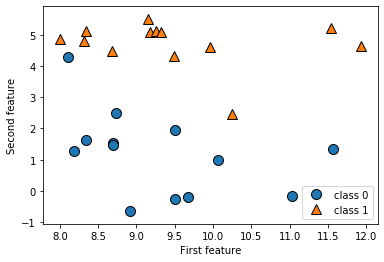

In [13]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc='best')
plt.xlabel("First feature")
plt.ylabel("Second feature")

Text(0, 0.5, 'target')

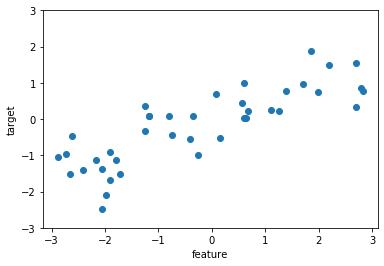

In [14]:
#wave dataset - regression에 사용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [15]:
#실제 dataset - 위스콘신 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [17]:
#569개 sample(data point), 30개 feature
print(cancer['data'].shape)

(569, 30)


In [19]:
print(cancer['target_names'])
print(cancer.target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [20]:
#실제 dataset2 - 보스턴 주태가격
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


# K-Nearest Neighbors
1) Classification

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [25]:
clf.score(X_test,y_test)

0.8571428571428571

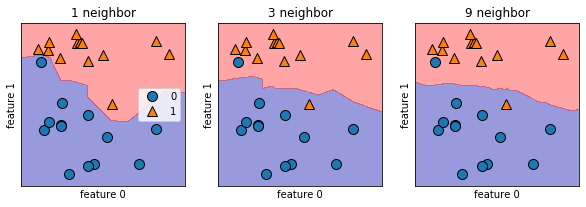

In [37]:
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc='best')

In [39]:
# 실전 예제로 test
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=66)
#stratify=cancer.target은 나누어진 dataset의 target비율을 cancer.target비율에 맞추겠다는 의미
#예를들어 cancer.target의 0,1비율이 25% 75%면 나누어진 dataset에서도 비율이 25% 75%가 되도록
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

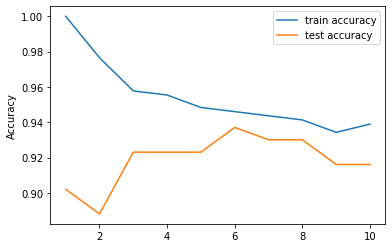

In [41]:
plt.plot(neighbors_setting,training_accuracy, label='train accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()